# Examen Módulo 2 - Simulación Monte Carlo. <font color =blue> Tipo de examen 1.  </font>

Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:

- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería Examen1_LopezMichel.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

In [9]:
%matplotlib inline 

import math
import numpy as np
import pandas as pd

from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import dblquad

from collections import OrderedDict


# Primer punto (50 puntos)

## <font color = red> Problema 1 <font>

### Evaluación numérica de integrales por el método Monte Carlo

**1. (20 puntos)** 

Estimar la siguiente integral por el método montecarlo

$$I = \int_{-\pi}^{\pi} \int_{-1}^{1} (\cos(y)\ x^2 + 1)\ dx\ dy$$

---





In [10]:

def monte_carlo_int_num(ax, bx, ay, by, fn, num_muestras, num_reps=100):
   
    
    resultados = []  
    for N in num_muestras:
        estimaciones = [] 
        
        for _ in range(num_reps):
            x = ax + (bx - ax) * np.random.rand(N)
            y = ay + (by - ay) * np.random.rand(N) 

           
            estimaciones.append((bx - ax) * (by - ay) * sum(fn(x, y)) / N)
        resultados.append(OrderedDict([
            ('N', N),
            ('Min', min(estimaciones)),
            ('Max', max(estimaciones)),
            ('Promedio', np.mean(estimaciones))
        ]))


    return resultados

**2. (20 puntos)**

Realice una tabla con la librería Pandas para los resultados de la integración Monte Carlo para la ecuación anterior realizando $100$ realizaciones para cada uno de los valores $N$ que se muestran en la tabla siguiente. Muestre el valor estimado de la integral promedio y el resultado de máximo y mínimo de las $100$ realizaciones.

|N|min|promedio|max|
|---|---|---|---|
|10|*|*|*|
|100|*|*|*|
|1000|*|*|*|
|10000|*|*|*|

In [11]:
fn = lambda x, y: np.cos(y) * x ** 2 + 1 
num_muestras = 10 ** np.array([1, 2, 3, 4])


resultados = monte_carlo_int_num(-1, 1, -np.pi, np.pi, fn, num_muestras)


df = pd.DataFrame(resultados)

df.head()

,N,Min,Max,Promedio
0,10,9.453740,16.066039,12.756186
1,100,11.815609,13.458683,12.579540
2,1000,12.257915,12.889876,12.557512
3,10000,12.466737,12.643718,12.568177


In [12]:
resultado_monte_carlo = resultados[-1]['Promedio']  
resultado_real = dblquad(fn, -np.pi, np.pi, lambda x: -1, lambda x: 1)[0]

error_absoluto = abs(resultado_monte_carlo - resultado_real)
error_relativo = error_absoluto * 100 / resultado_real

print('El error relativo es: {:.4f}%.'.format(error_relativo))

El error relativo es: 0.0144%.


En N = 10000 muestras, el error por este método esta abajo  del 1%

**3. (10 puntos)** 

Grafique la funcion a integrar.

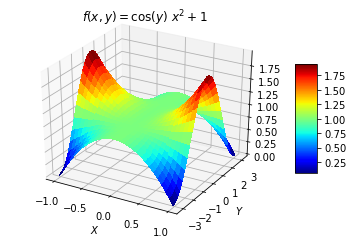

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-1, 1, 30)
y = np.linspace(-np.pi, np.pi, 30)
X, Y = np.meshgrid(x, y)


Z = fn(X, Y)


surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=False)


plt.title('$f(x, y) = \cos(y)\ x^{2} + 1$')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')


fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

# Segundo punto (50 puntos)

## Ley del enfriamiento de Newton

La ley empírica de Newton, relativa al enfriamiento de un objeto, se expresa con la ecuación diferencial lineal de primer orden

$$\frac{dT}{dt} = k(T - T_m)$$

en que $k$ es una constante de proporcionalidad, $T(t)$ es la temperatura del objeto cuando $t > 0$ y $T_m$ es la temperatura ambiente; o sea, la temperatura del medio que rodea al objeto. Supondremos que $T_m$ es constante.

## <font color = red> Problema 2 <font>

### ¿Cuánto esperar para comenzar a comer pastel?

Al sacar un pastel del horno, su temperatura es $280°\ C$. Después de $3$ minutos, $200°\ C$. ¿En cuanto tiempo se enfriará hasta la temperatura ambiente de $28°\ C$? Realiza las siguientes actividades:

**1. (5 puntos)** 

- Simule el sistema en un tiempo de $0$ a $60$ unidades de tiempo con una constante de proporcionalidad $k = -0.14518$.
- Grafique la solución.

---

La _**ley de enfriamiento de Newton**_ establece que la rapidez de enfriamiento de un objeto es proporcional a la diferencia de temperatura entre el objeto y su ambiente, siempre que esta diferencia no sea muy grande. Por medio de una simple sustitución de variables, podemos reducir la ley de Newton a una instancia de la _**ley de decaimiento natural**_ (cuando $k < 0$) y así encontrar una solución cerrada a la ecuación diferencial. Tomando $y = T - T_m$, $y(0) = T(0) - T_m$. Sustituyendo $T$ por $y$ obtenemos

$$\frac{dy}{dt} = k y$$

cuya solución, por la ley de decaimiento natural, es

$$y = y(0)\ e^{kt}$$

sustituyendo de vuelta $y$ por $T$ y despejando para $T$, obtenemos

$$T = T_m + (T(0) - T_m)\ e^{kt}$$

La implementación es:

In [15]:

def enfriamiento_newton(t, T_0, T_m, const_prop):
   
    
    T = T_m + (T_0 - T_m) * np.exp(const_prop * t)
    
    return T

In [16]:
def muestra_graficas():
    
    plt.title('Enfriamiento del pastel')
    plt.xlabel('Unidades de tiempo')
    plt.ylabel('Temperatura')

    
    axes = plt.gca()
    axes.set_xlim([0, t_f])
    axes.set_ylim([0, 300])
    plt.grid(True, lw=0.5, ls='--', c='0.75')

    
    plt.legend()
    plt.show()

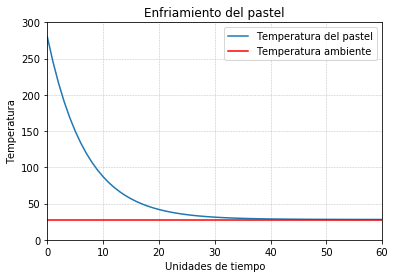

In [17]:
T_0, T_m = 280, 28  
k = -0.14518  

t_0, t_f = 0, 60  
t = np.linspace(t_0, t_f, t_f - t_0 + 1)


T = enfriamiento_newton(t, T_0, T_m, k)


plt.plot(t, T, label='Temperatura del pastel')


plt.plot(t, T_m * np.ones(t_f - t_0 + 1), label='Temperatura ambiente', color='red')


muestra_graficas()

**2. (20 puntos)**
- Supoga que cada unidad de tiempo corresponde a un minuto. ¿Qué temperatura tiene en el minuto $20$?
- Ahora simula tu sistema utilizando una variable aleatoria para la temperatura inicial $T_0$ con una distribución normal de media $280$ y una desviación estándar de $15$. Realiza $100$ realizaciones.
- Grafica las $100$ realizaciones.

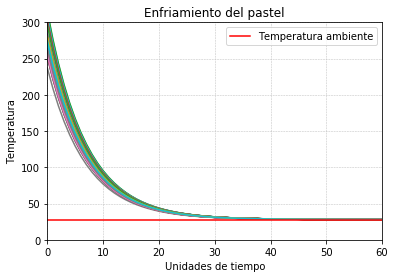

In [18]:
num_reps = 100  
temps = []  

for _ in range(num_reps):

    T_0 = np.random.normal(280.0, 15.0)


    T = enfriamiento_newton(t, T_0, T_m, k)
    
 
    temps.append(T[20])

  
    plt.plot(t, T)


plt.plot(t, T_m * np.ones(t_f - t_0 + 1), label='Temperatura ambiente', color='red')

muestra_graficas()

**3. (25 puntos)**
- De las $100$ realizaciones, ¿cuál es la temperatura promedio en el minuto $20$?
- ¿Cuál es la desviacián estándar de los valores anteriores?

In [19]:

print('Temperatura promedio en el minuto 20: {:.4f}º C.'.format(np.mean(temps)))
print('Desviación estandar: {:.4f}º C.'.format(np.std(temps)))

La temperatura promedio en el minuto 20 es: 41.9032º C.
La desviación estandar es: 0.8366º C.


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Michel Emanuel López Franco.
</footer>